In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import os
os.getcwd()

'C:\\Users\\Gauri Golande\\Documents\\01_Live project\\03_Milestone_2'

In [3]:
df = pd.read_csv("abp_accel.csv")
print(df.info())

## 14595853 row entries and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595853 entries, 0 to 14595852
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  object
 1   x          int64 
 2   y          int64 
 3   z          int64 
dtypes: int64(3), object(1)
memory usage: 445.4+ MB
None


In [4]:
df.head()

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860


In [5]:
print(df.tail())

                           timestamp    x     y    z
14595848  2015-06-29 08:29:59.416163   76  1040 -128
14595849  2015-06-29 08:29:59.515527   68  1052 -140
14595850  2015-06-29 08:29:59.614891  112  1024 -132
14595851  2015-06-29 08:29:59.714255  104  1052 -152
14595852  2015-06-29 08:29:59.813619   84  1044 -132


In [6]:
## Given x, y and z acceleration recordings are in mg, hence need to be converted to m/s2 
## Amag = Acceleration magnitude

df['Amag'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

In [7]:
# Rounding off the time entry from timestamp column
from datetime import datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['timestamp'] = df['timestamp'].dt.round('1S')
print(df.head())
print(df.tail())

            timestamp    x    y    z         Amag
0 2015-06-12 13:30:00  100  620  804  1020.203901
1 2015-06-12 13:30:00   68  640  800  1026.754109
2 2015-06-12 13:30:00   48  628  884  1085.423420
3 2015-06-12 13:30:00   44  616  888  1081.635798
4 2015-06-12 13:30:01   76  628  860  1067.595429
                   timestamp    x     y    z         Amag
14595848 2015-06-29 08:29:59   76  1040 -128  1050.599829
14595849 2015-06-29 08:30:00   68  1052 -140  1063.450986
14595850 2015-06-29 08:30:00  112  1024 -132  1038.529730
14595851 2015-06-29 08:30:00  104  1052 -152  1068.000000
14595852 2015-06-29 08:30:00   84  1044 -132  1055.659036


In [10]:
## Resampling the timestamp with a frame  of 3 seconds window

df.set_index('timestamp', inplace = True)
sample_1 = df.resample('3S').mean()       ##RangeIndex error, index needs to be set
sample_1.reset_index(inplace=True)
sample_1

,timestamp,x,y,z,Amag
0,2015-06-12 13:30:00,133.500000,613.666667,844.000000,1052.898797
1,2015-06-12 13:30:03,-3.866667,593.733333,850.400000,1046.095666
2,2015-06-12 13:30:06,-600.933333,447.333333,701.733333,1039.915529
3,2015-06-12 13:30:09,-809.290323,340.645161,562.451613,1046.284852
4,2015-06-12 13:30:12,-730.133333,377.066667,617.200000,1034.343850
...,...,...,...,...,...
483596,2015-06-29 08:29:48,-36.133333,1036.666667,-124.400000,1045.040360
483597,2015-06-29 08:29:51,-10.666667,1034.000000,-133.866667,1043.102388
483598,2015-06-29 08:29:54,28.133333,1035.733333,-133.733333,1044.881945
483599,2015-06-29 08:29:57,63.600000,1033.333333,-130.800000,1043.858749


In [ ]:
## The data entries are seen for different dates, hence we need to select start and end time for data visualization.

#start_time = pd.to_datetime('2015-06-14 00:00:00')
#end_time = pd.to_datetime('2015-06-14 23:59:59')
#sample_1 = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]
#sample_1

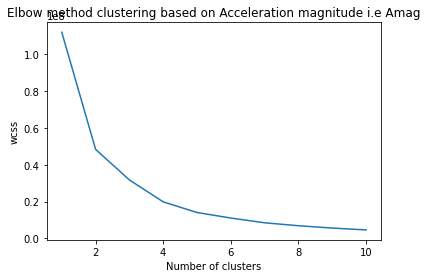

In [11]:
## Different methods of clustering - Elbow method, Avg silhouette, Gap statistics method

#Using Elbow method finding the optimal number of clusters to be used in K-Means clustering method
## https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(sample_1[['Amag']])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow method clustering based on Acceleration magnitude i.e Amag')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')                         ##Within cluster sum of squares
plt.show()

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sample_1[['x', 'y', 'z']])

In [13]:
## Principal component analysis - reduction of 3 dimensions

pca = PCA(2)

##Transform the data
reduced_data = pca.fit_transform(scaled_features)
print(reduced_data.shape)
print('Explained variance ratio is 3s is :', pca.explained_variance_ratio_)     ## explained variance ratio of PCA1 is more.

## Higher ecplained variance ratio means that axis will have higher effect on target feature.

(483601, 2)
Explained variance ratio is 3s is : [0.50351444 0.33668313]


In [14]:
reduced_data_df = pd.DataFrame(data = reduced_data, columns = ['PCA1', 'PCA2'])
reduced_data_df

,PCA1,PCA2
0,1.922738,-1.701457
1,2.209735,-1.433758
2,3.413071,0.112521
3,3.904933,0.841567
4,3.735590,0.560601
...,...,...
483596,-0.773161,0.749128
483597,-0.815605,0.717442
483598,-0.879760,0.637603
483599,-0.919900,0.558509


In [15]:

## KMeans clustering
num_clusters = 4                   ## optimal K
kmeans = KMeans(n_clusters = 4)
kmeans.fit(reduced_data_df)


reduced_data_df['cluster'] = kmeans.labels_


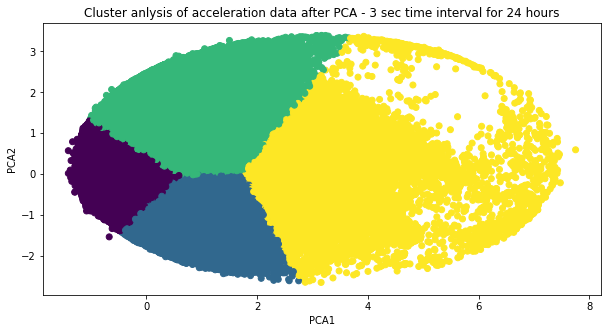

In [16]:
## Visualize the clusters
plt.figure(figsize = (10, 5))
plt.scatter(reduced_data_df['PCA1'], reduced_data_df['PCA2'], c = kmeans.labels_ , cmap = 'viridis')
plt.title('Cluster anlysis of acceleration data after PCA - 3 sec time interval for 24 hours')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [17]:
reduced_data_df

,PCA1,PCA2,cluster
0,1.922738,-1.701457,1
1,2.209735,-1.433758,1
2,3.413071,0.112521,3
3,3.904933,0.841567,3
4,3.735590,0.560601,3
...,...,...,...
483596,-0.773161,0.749128,0
483597,-0.815605,0.717442,0
483598,-0.879760,0.637603,0
483599,-0.919900,0.558509,0


In [18]:
sample_1['cluster'] = kmeans.labels_
sample_1

,timestamp,x,y,z,Amag,cluster
0,2015-06-12 13:30:00,133.500000,613.666667,844.000000,1052.898797,1
1,2015-06-12 13:30:03,-3.866667,593.733333,850.400000,1046.095666,1
2,2015-06-12 13:30:06,-600.933333,447.333333,701.733333,1039.915529,3
3,2015-06-12 13:30:09,-809.290323,340.645161,562.451613,1046.284852,3
4,2015-06-12 13:30:12,-730.133333,377.066667,617.200000,1034.343850,3
...,...,...,...,...,...,...
483596,2015-06-29 08:29:48,-36.133333,1036.666667,-124.400000,1045.040360,0
483597,2015-06-29 08:29:51,-10.666667,1034.000000,-133.866667,1043.102388,0
483598,2015-06-29 08:29:54,28.133333,1035.733333,-133.733333,1044.881945,0
483599,2015-06-29 08:29:57,63.600000,1033.333333,-130.800000,1043.858749,0


In [19]:
reduced_data_df['cluster'] = pd.Categorical(reduced_data_df['cluster'])

In [20]:
median = reduced_data_df.groupby('cluster').agg({'PCA1' : 'median', 'PCA2' : 'median'})
median

,PCA1,PCA2
cluster,,
0,-0.800767,-0.222302
1,0.752092,-1.519892
2,0.464666,1.167961
3,3.272348,-0.553177


In [21]:
## In PCA 1 : cluster 3 > 1 > 2 > 0
## cluster 0 - resting
## cluster 2 - standing
## cluster 1 - eating
## cluster 3 - ruminating

palette = {0 : 'yellow', 1 : 'green', 2 : 'cyan', 3 : 'red'}

In [24]:
start_time = pd.to_datetime('2015-06-14 00:00:00')
end_time = pd.to_datetime('2015-06-14 23:59:59')
subset_sample_1 = sample_1[(sample_1['timestamp'] >= start_time) & (sample_1['timestamp'] <= end_time)]
subset_sample_1

,timestamp,x,y,z,Amag,cluster
41400,2015-06-14 00:00:00,254.709677,836.258065,593.548387,1056.832779,1
41401,2015-06-14 00:00:03,249.466667,834.666667,589.066667,1051.803061,1
41402,2015-06-14 00:00:06,250.000000,836.266667,590.933333,1054.122859,1
41403,2015-06-14 00:00:09,253.066667,836.266667,594.400000,1056.887594,1
41404,2015-06-14 00:00:12,249.066667,824.133333,609.333333,1055.116547,1
...,...,...,...,...,...,...
70195,2015-06-14 23:59:45,-444.400000,789.733333,-452.800000,1013.078157,2
70196,2015-06-14 23:59:48,-447.200000,784.800000,-460.400000,1013.857015,2
70197,2015-06-14 23:59:51,-447.866667,786.000000,-458.266667,1014.120854,2
70198,2015-06-14 23:59:54,-444.000000,785.548387,-461.677419,1013.620142,2


In [28]:
#plt.figure(figsize = (20, 10))
#sns.scatterplot(x = 'timestamp', y = 'x', hue = 'cluster' , palette = palette, data = subset_sample_1)
#plt.title('Cluster anlysis of x-acceleration data (PCA - 3 sec time interval for 24 hrs)')
#plt.xlabel('timestamp')
#plt.ylabel('x-acceleration')
#plt.show()

#plt.figure(figsize = (20, 10))
#sns.scatterplot(x = 'timestamp', y = 'y', hue = 'cluster' , palette = palette, data = sample_1)
#plt.title('Cluster anlysis of y-acceleration data (PCA - 3 sec time interval)')
#plt.xlabel('timestamp')
#plt.ylabel('y-acceleration')
#plt.show()

#plt.figure(figsize = (20, 10))
#sns.scatterplot(x = 'timestamp', y = 'z', hue = 'cluster' , palette = palette, data = sample_1)
#plt.title('Cluster anlysis of z-acceleration data (PCA - 3 sec time interval)')
#plt.xlabel('timestamp')
#plt.ylabel('z-acceleration')
#plt.show()

In [29]:
sample_1['cluster'].value_counts()

0    278161
2    113476
1     60096
3     31868
Name: cluster, dtype: int64

In [30]:
sample_1['timestamp'].value_counts()

2015-06-12 13:30:00    1
2015-06-23 18:09:51    1
2015-06-23 18:10:27    1
2015-06-23 18:10:24    1
2015-06-23 18:10:21    1
                      ..
2015-06-18 03:49:48    1
2015-06-18 03:49:45    1
2015-06-18 03:49:42    1
2015-06-18 03:49:39    1
2015-06-29 08:30:00    1
Name: timestamp, Length: 483601, dtype: int64

In [35]:
def activity_label(value):
    if value == 0:
        return "resting"
    if value == 1:
        return "eating"
    if value == 2:
        return "standing"
    if value == 3:
        return "ruminating"

subset_sample_1['activity_label'] = subset_sample_1['cluster'].map(activity_label)
subset_sample_1

C:\Users\GAURIG~1\AppData\Local\Temp/ipykernel_18856/3895975134.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_sample_1['activity_label'] = subset_sample_1['cluster'].map(activity_label)


,timestamp,x,y,z,Amag,cluster,activity_label
41400,2015-06-14 00:00:00,254.709677,836.258065,593.548387,1056.832779,1,eating
41401,2015-06-14 00:00:03,249.466667,834.666667,589.066667,1051.803061,1,eating
41402,2015-06-14 00:00:06,250.000000,836.266667,590.933333,1054.122859,1,eating
41403,2015-06-14 00:00:09,253.066667,836.266667,594.400000,1056.887594,1,eating
41404,2015-06-14 00:00:12,249.066667,824.133333,609.333333,1055.116547,1,eating
...,...,...,...,...,...,...,...
70195,2015-06-14 23:59:45,-444.400000,789.733333,-452.800000,1013.078157,2,standing
70196,2015-06-14 23:59:48,-447.200000,784.800000,-460.400000,1013.857015,2,standing
70197,2015-06-14 23:59:51,-447.866667,786.000000,-458.266667,1014.120854,2,standing
70198,2015-06-14 23:59:54,-444.000000,785.548387,-461.677419,1013.620142,2,standing


In [36]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483601 entries, 0 to 483600
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  483601 non-null  datetime64[ns]
 1   x          483601 non-null  float64       
 2   y          483601 non-null  float64       
 3   z          483601 non-null  float64       
 4   Amag       483601 non-null  float64       
 5   cluster    483601 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 20.3 MB


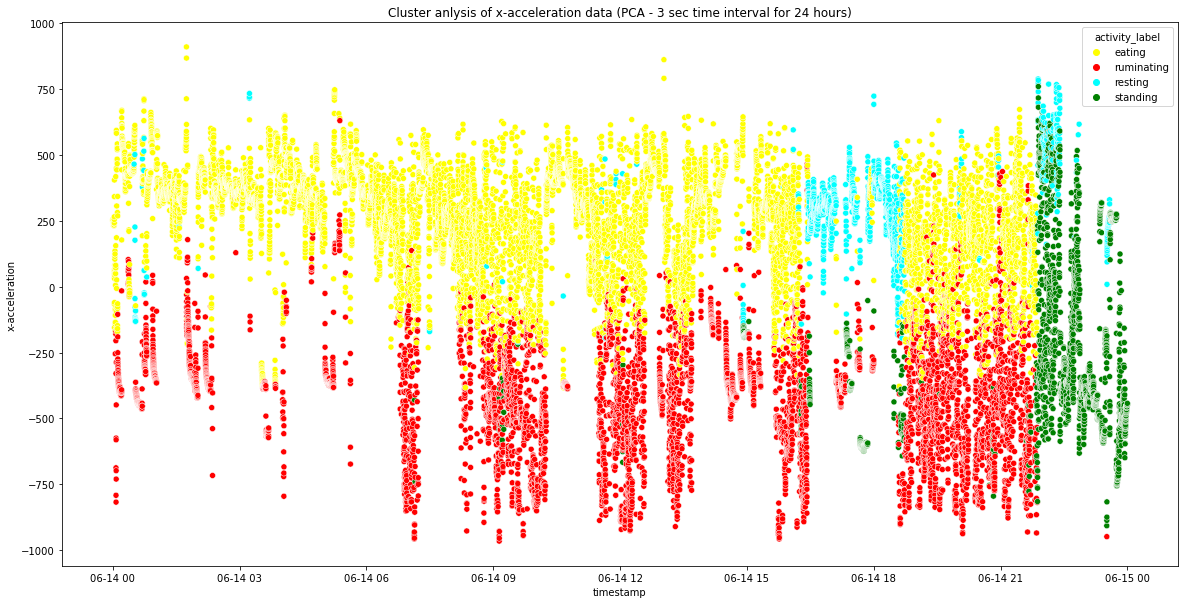

In [37]:
palette = {'resting' : 'cyan', 'standing' : 'green', 'ruminating' : 'red', 'eating' : 'yellow'}

plt.figure(figsize = (20, 10))
sns.scatterplot(x = 'timestamp', y = 'x', hue = 'activity_label' , palette = palette, data = subset_sample_1)
plt.title('Cluster anlysis of x-acceleration data (PCA - 3 sec time interval for 24 hours)')
plt.xlabel('timestamp')
plt.ylabel('x-acceleration')
plt.show()

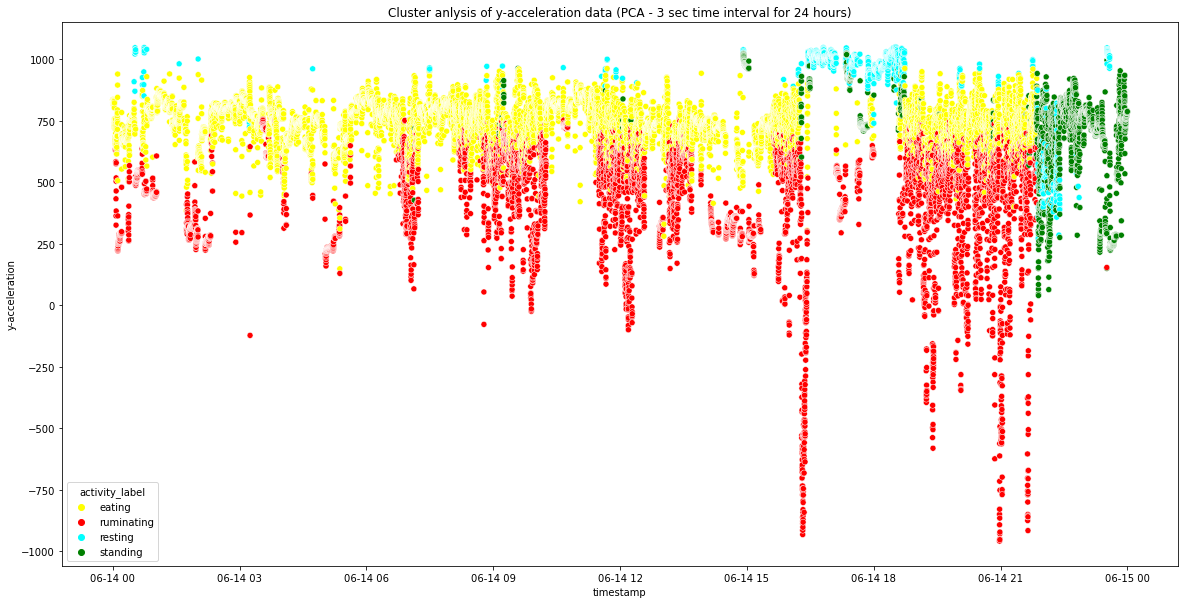

In [38]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = 'timestamp', y = 'y', hue = 'activity_label' , palette = palette, data = subset_sample_1)
plt.title('Cluster anlysis of y-acceleration data (PCA - 3 sec time interval for 24 hours)')
plt.xlabel('timestamp')
plt.ylabel('y-acceleration')
plt.show()

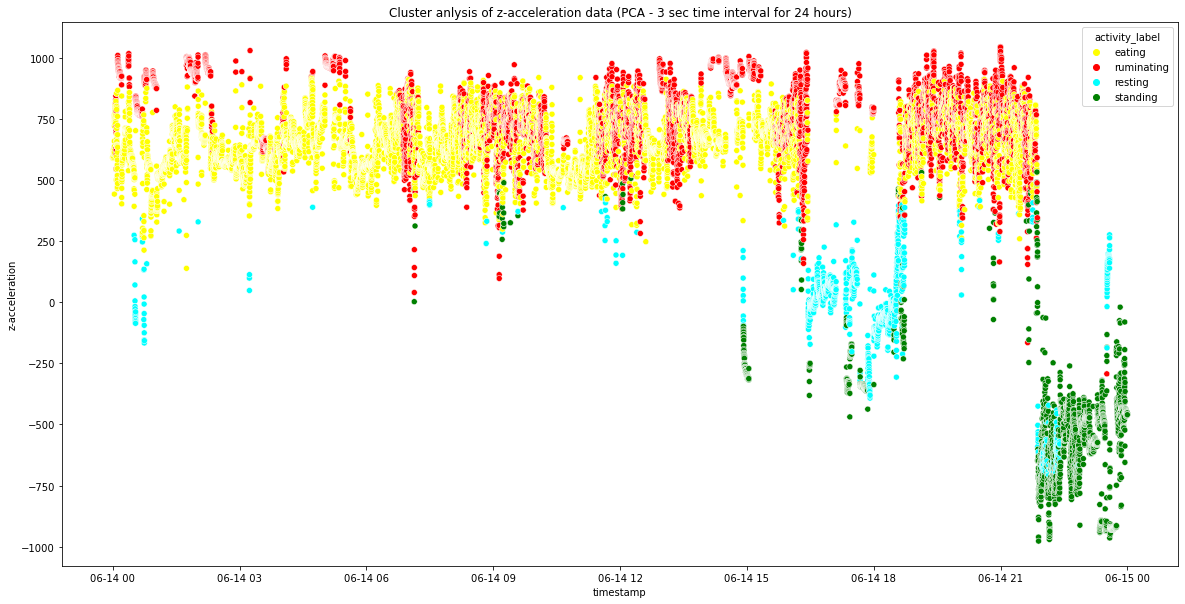

In [39]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = 'timestamp', y = 'z', hue = 'activity_label' , palette = palette, data = subset_sample_1)
plt.title('Cluster anlysis of z-acceleration data (PCA - 3 sec time interval for 24 hours)')
plt.xlabel('timestamp')
plt.ylabel('z-acceleration')
plt.show()

In [85]:
## KNN classification model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import RadiusNeighborsClassifier


In [57]:
sample_1

,timestamp,x,y,z,Amag,cluster
0,2015-06-12 13:30:00,133.500000,613.666667,844.000000,1052.898797,1
1,2015-06-12 13:30:03,-3.866667,593.733333,850.400000,1046.095666,1
2,2015-06-12 13:30:06,-600.933333,447.333333,701.733333,1039.915529,3
3,2015-06-12 13:30:09,-809.290323,340.645161,562.451613,1046.284852,3
4,2015-06-12 13:30:12,-730.133333,377.066667,617.200000,1034.343850,3
...,...,...,...,...,...,...
483596,2015-06-29 08:29:48,-36.133333,1036.666667,-124.400000,1045.040360,0
483597,2015-06-29 08:29:51,-10.666667,1034.000000,-133.866667,1043.102388,0
483598,2015-06-29 08:29:54,28.133333,1035.733333,-133.733333,1044.881945,0
483599,2015-06-29 08:29:57,63.600000,1033.333333,-130.800000,1043.858749,0


In [46]:
X = sample_1[['x', 'y', 'z']]
Y = sample_1['cluster']

In [79]:
## Split the data in train & test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [111]:
## Default KNN model

knn_model_default = KNeighborsClassifier(n_neighbors = 8)
knn_model_default.fit(X_train, Y_train)
Y_pred_KNN_default = knn_model_default.predict(X_test)

In [112]:
## Hyperparameter tuning
estimator_KNN = KNeighborsClassifier()
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
grid_search_KNN = GridSearchCV(estimator = estimator_KNN, param_grid = parameters_KNN, scoring = 'accuracy', n_jobs = -1, cv = 5) 

In [113]:
KNN = grid_search_KNN.fit(X_train, Y_train)
Y_pred_KNN = KNN.predict(X_test)


#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_)

#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )


{'leaf_size': 1, 'metric': 'chebyshev', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.9983405707196031


In [114]:
from sklearn import metrics
print('Accuracy Score - KNN - Default:', metrics.accuracy_score(Y_test, Y_pred_KNN_default)) 

Accuracy Score - KNN - Default: 0.9980872819759928


In [115]:
cf_mat = confusion_matrix(Y_test, Y_pred_KNN_default)
print('Confusion matric')
print(cf_mat)

Confusion matric
[[55610    18    15     0]
 [   48 12028     4     8]
 [   58     3 22453     3]
 [    0    13    15  6445]]


In [116]:
print('Classification Report')
print(classification_report(Y_test, Y_pred_KNN_default))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55643
           1       1.00      1.00      1.00     12088
           2       1.00      1.00      1.00     22517
           3       1.00      1.00      1.00      6473

    accuracy                           1.00     96721
   macro avg       1.00      1.00      1.00     96721
weighted avg       1.00      1.00      1.00     96721



In [117]:
### Random forest classification model:

from sklearn.ensemble import RandomForestClassifier

# Split data
X = sample_1[['x', 'y', 'z']]
Y = sample_1['cluster']

In [125]:
## Split the data in train & test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [126]:
classifier = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80)

In [127]:
Y_pred = classifier.predict(X_test)

In [128]:
### Evaluation of model

print('Accuracy Score - Random forest model :', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score - Random forest model : 0.9983560964009884


In [130]:
cf_mat_rf = confusion_matrix(Y_test, Y_pred)
print('Confusion matric')
print(cf_mat_rf)

Confusion matric
[[55702     9    32     0]
 [   14 11940     4     9]
 [   52     7 22641     6]
 [    0    13    13  6279]]


In [131]:
print('Classification Report')
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55743
           1       1.00      1.00      1.00     11967
           2       1.00      1.00      1.00     22706
           3       1.00      1.00      1.00      6305

    accuracy                           1.00     96721
   macro avg       1.00      1.00      1.00     96721
weighted avg       1.00      1.00      1.00     96721



In [134]:
## SVM classification model:

from sklearn.svm import SVC

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [136]:
classifier_svc = SVC(kernel='linear', random_state=42)
classifier_svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [137]:
Y_pred_svc = classifier_svc.predict(X_test)

In [138]:
print('Accuracy Score - SVM :', metrics.accuracy_score(Y_test, Y_pred_svc))

Accuracy Score - SVM : 0.999979321967308


In [139]:
cf_mat_svc = confusion_matrix(Y_test, Y_pred_svc)
print('Confusion matric')
print(cf_mat_svc)

Confusion matric
[[55741     1     1     0]
 [    0 11967     0     0]
 [    0     0 22706     0]
 [    0     0     0  6305]]


In [140]:
print('Classification Report')
print(classification_report(Y_test, Y_pred_svc))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55743
           1       1.00      1.00      1.00     11967
           2       1.00      1.00      1.00     22706
           3       1.00      1.00      1.00      6305

    accuracy                           1.00     96721
   macro avg       1.00      1.00      1.00     96721
weighted avg       1.00      1.00      1.00     96721

